In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 코랩
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 재시작
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [4]:
url = '/content/drive/MyDrive/Colab Notebooks/파이널프로젝트_RAW_210329_210926.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 00:00:00
2,2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 00:00:00
3,3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 00:00:00
4,4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 00:00:00


In [5]:
df.shape

(105419, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              105419 non-null  int64  
 1   id                      105419 non-null  int64  
 2   customer_id             105416 non-null  float64
 3   course_id               100212 non-null  float64
 4   type                    105419 non-null  object 
 5   state                   105419 non-null  object 
 6   course_title            105403 non-null  object 
 7   category_title          105395 non-null  object 
 8   format                  105403 non-null  object 
 9   completed_at            105419 non-null  object 
 10  transaction_amount      105419 non-null  int64  
 11  coupon_title            31817 non-null   object 
 12  coupon_discount_amount  31817 non-null   float64
 13  sale_price              104291 non-null  float64
 14  tax_free_amount     

In [7]:
df.isnull().sum()

Unnamed: 0                    0
id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [8]:
df['category_title'].value_counts()

프로그래밍       34430
데이터사이언스     14076
업무 생산성      13323
디자인         12009
영상/3D       10260
마케팅          9857
부동산/금융       5523
투자/재테크       2501
크리에이티브       2250
교육           1031
지식콘텐츠          56
비즈니스           42
파이낸스           25
데이터 사이언스        9
관리              2
일러스트            1
Name: category_title, dtype: int64

In [9]:
df['coupon_title'].value_counts()

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                                 5498
[WELCOME] 온라인 강의 3만원 할인쿠폰                                3206
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                                 2469
[WELCOME] 온라인 강의 2만원 할인쿠폰                                2325
[WELCOME] 온라인 강의 1만원 할인쿠폰                                1900
                                                         ... 
[무료수강권] 한 번에 끝내는 Java/Spring 웹 개발 마스터 초격차 패키지_안성훈 강사님       1
오늘 단 하루! 하루 10분컷 5%할인 (~6/2)                                1
[무료수강권] RED 검수용_공정필 PM님                                     1
[서포터즈 전용] 재무/세무 회계 실무 완성 무료 수강                              1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                   1
Name: coupon_title, Length: 494, dtype: int64

In [10]:
df['category_title'].replace('데이터 사이언스','데이터사이언스',inplace=True)
df['category_title'].value_counts()

프로그래밍      34430
데이터사이언스    14085
업무 생산성     13323
디자인        12009
영상/3D      10260
마케팅         9857
부동산/금융      5523
투자/재테크      2501
크리에이티브      2250
교육          1031
지식콘텐츠         56
비즈니스          42
파이낸스          25
관리             2
일러스트           1
Name: category_title, dtype: int64

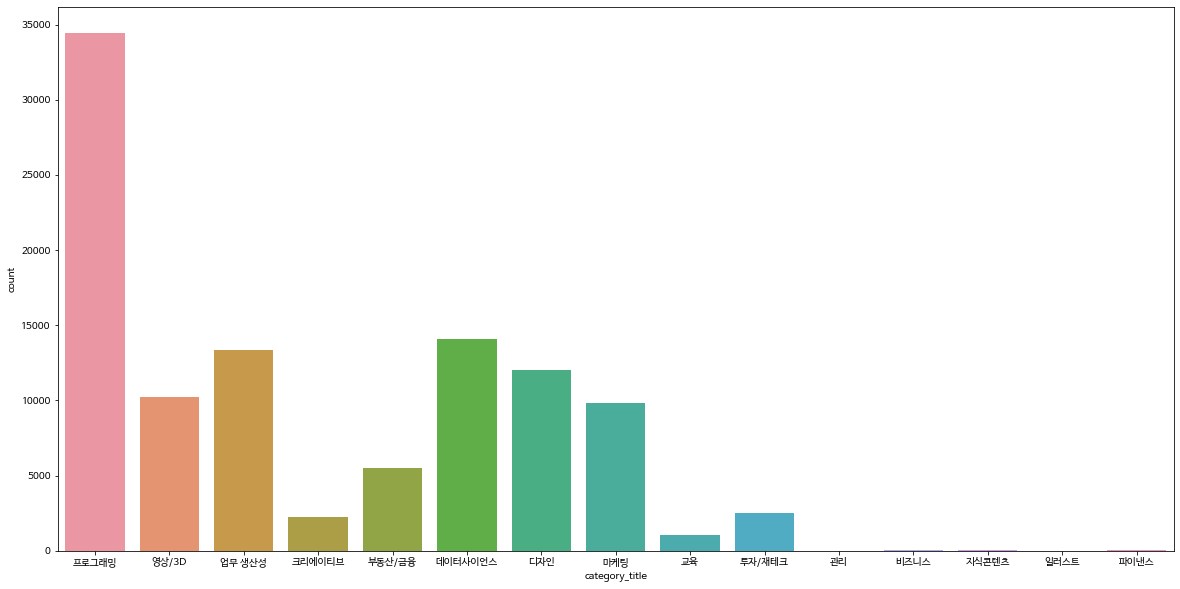

In [11]:
# 강의별 거래 횟수
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='category_title')

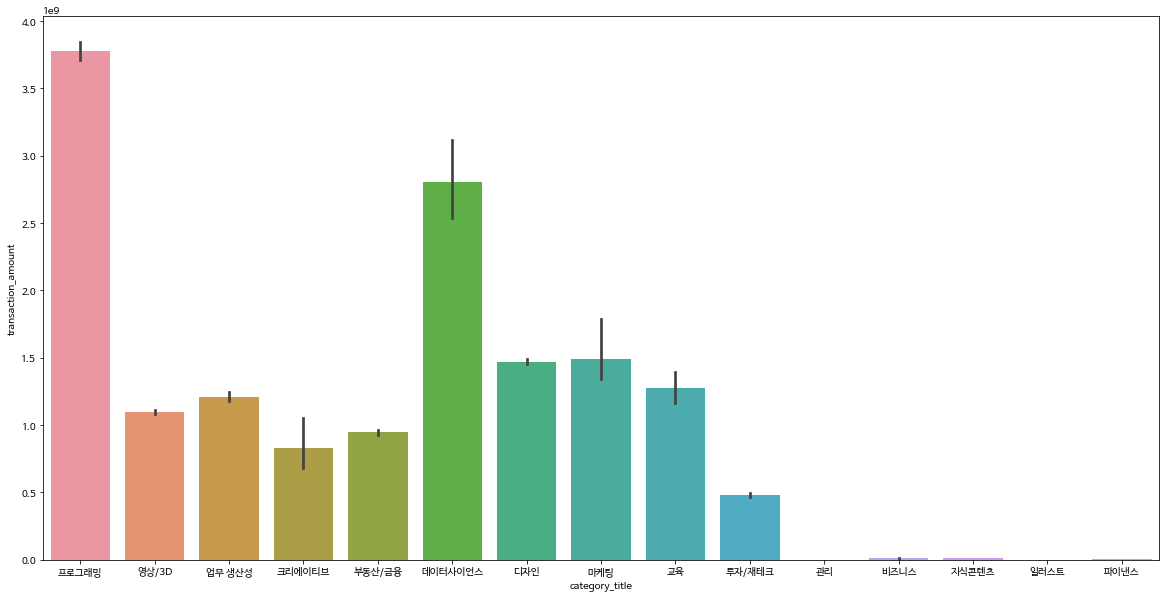

In [12]:
# 강의별 거래액
plt.figure(figsize=(20,10))
sns.barplot(x='category_title',y='transaction_amount', data=df, estimator=np.sum)

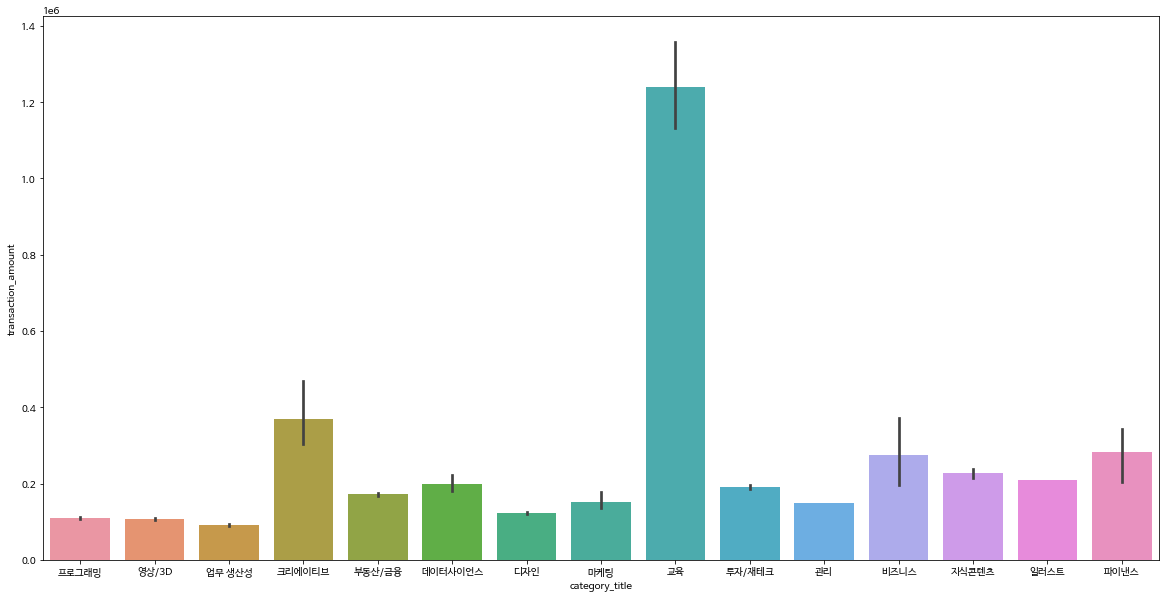

In [13]:
# 강의별 평균 거래액
plt.figure(figsize=(20,10))
sns.barplot(x='category_title',y='transaction_amount', data=df, estimator=np.mean)

In [14]:
pd.pivot_table(
    data=df,
    values='transaction_amount',
    columns='category_title',
    aggfunc=np.mean
)

category_title,관리,교육,데이터사이언스,디자인,마케팅,부동산/금융,비즈니스,업무 생산성,영상/3D,일러스트,지식콘텐츠,크리에이티브,투자/재테크,파이낸스,프로그래밍
transaction_amount,150000.0,1.238346e+06,198895.578559,122579.884087,151593.587704,171408.674452,274148.095238,90854.526383,107006.976608,208000.0,228160.714286,368952.678667,191769.190324,283200.0,109669.452019


In [15]:
df[df['category_title']=='교육']

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
98,98,970949,474219.0,204387.0,ORDER,CANCELLED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-28 18:17:13,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,NaN,NaN
110,110,970745,478087.0,204387.0,ORDER,CANCELLED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-28 18:35:54,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,NaN,NaN
169,169,971168,478266.0,204387.0,ORDER,CANCELLED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-28 20:02:19,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,NaN,NaN
384,384,971672,478457.0,204387.0,ORDER,CANCELLED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-28 22:46:22,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,NaN,NaN
631,631,972364,478743.0,204039.0,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,100000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104859,104859,1361140,107470.0,207326.0,PAYMENT,CANCELLED,(B2B) 한남대학교 2021년 가을학기 온라인 구독,교육,B2B 온라인,2021-09-23 15:57:29,300000,NaN,NaN,300000.0,300000.0,INICIS,CARD,NaN,NaN
104905,104905,1367252,672301.0,207714.0,PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,2000000,NaN,NaN,NaN,NaN,NaN,ONSITE,NaN,NaN
105163,105163,1367258,672307.0,207731.0,PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,600000,NaN,NaN,NaN,NaN,NaN,ONSITE,NaN,NaN
105174,105174,1363720,29356.0,207729.0,PAYMENT,CANCELLED,(B2B) 디캠프 패밀리사 온라인 구독 올 플랜 (9월),교육,B2B 온라인,2021-09-24 14:41:04,150000,NaN,NaN,150000.0,150000.0,INICIS,CARD,NaN,NaN


In [16]:
#교육에 대한 데이터

In [17]:
df.groupby('category_title').mean()['transaction_amount'].sort_values(ascending=False)

category_title
교육         1.238346e+06
크리에이티브     3.689527e+05
파이낸스       2.832000e+05
비즈니스       2.741481e+05
지식콘텐츠      2.281607e+05
일러스트       2.080000e+05
데이터사이언스    1.988956e+05
투자/재테크     1.917692e+05
부동산/금융     1.714087e+05
마케팅        1.515936e+05
관리         1.500000e+05
디자인        1.225799e+05
프로그래밍      1.096695e+05
영상/3D      1.070070e+05
업무 생산성     9.085453e+04
Name: transaction_amount, dtype: float64

In [18]:
df.head()

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 00:00:00
2,2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 00:00:00
3,3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 00:00:00
4,4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 00:00:00


In [19]:
# 무조건 전처리 해야 하는 항목들
# type & state 컬럼

In [20]:
df['state'].value_counts()

COMPLETED    62763
CANCELLED    41279
PENDING       1144
DELETED        219
REQUESTED       14
Name: state, dtype: int64

In [21]:
df.loc[df['customer_id'] == 172881]

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
152,152,971126,172881.0,201998.0,ORDER,CANCELLED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-03-28 19:48:17,110500,NaN,NaN,110500.0,110500.0,NaN,VBANK,모바일앱,2020-01-14 00:00:00
161,161,971156,172881.0,201998.0,PAYMENT,PENDING,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-03-28 19:55:58,110500,NaN,NaN,110500.0,110500.0,NaN,VBANK,모바일앱,2020-01-14 00:00:00


In [22]:
df.loc[df['customer_id'] == 478246]

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
157,157,971143,478246.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 19:51:41,116000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 00:00:00
158,158,971130,478246.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 19:51:59,116000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 00:00:00


In [23]:
df_com = df.loc[df['state'] == 'COMPLETED']
df_com.count()

Unnamed: 0                62763
id                        62763
customer_id               62760
course_id                 60233
type                      62763
state                     62763
course_title              62759
category_title            62755
format                    62759
completed_at              62763
transaction_amount        62763
coupon_title              23801
coupon_discount_amount    23801
sale_price                61680
tax_free_amount           61680
pg                        52409
method                    60194
subcategory_title         51804
marketing_start_at        51751
dtype: int64

## type 과 state 컬럼 고려한 전처리



In [24]:
df['type'].value_counts(), df['state'].value_counts()

(PAYMENT        61433
 ORDER          40159
 REFUND          3824
 TRANSACTION        3
 Name: type, dtype: int64, COMPLETED    62763
 CANCELLED    41279
 PENDING       1144
 DELETED        219
 REQUESTED       14
 Name: state, dtype: int64)

    state = order 
    옛날에 사용하던 양식으로 불필요한 데이터이기에 
    해당 로우 제외한다

In [25]:
# state = order 제외
df_new = df[df['type'] != 'ORDER']
df_new.shape

(65260, 19)

In [26]:
# df_new['type'].unique()
df_new = df[(df['type'] == 'PAYMENT') |(df['type'] == 'REFUND')]

In [27]:
df_new['type'].unique()

array(['PAYMENT', 'REFUND'], dtype=object)

In [28]:
df_new =df_new[(df_new['state'] == 'REQUESTED') | (df_new['state'] == 'COMPLETED')]
# df_new =df[df['state'] == 'COMPLETED'

In [29]:
df_new['state'].unique()

array(['COMPLETED', 'REQUESTED'], dtype=object)

In [30]:
df_new['state'].value_counts()

COMPLETED    56724
REQUESTED       14
Name: state, dtype: int64

In [31]:
df_new = df_new[~((df_new['coupon_discount_amount'] > df_new['sale_price']) & (df_new['transaction_amount'] > 0))]

In [32]:
df_new

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 00:00:00
4,4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 00:00:00
8,8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 00:00:00
10,10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27 00:00:00
14,14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23 00:00:00
105412,105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02 00:00:00
105413,105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31 00:00:00
105416,105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15 00:00:00


## 카테고리별 매출 및 판매량 추이


In [33]:
df_new.head()

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 00:00:00
4,4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 00:00:00
8,8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 00:00:00
10,10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27 00:00:00
14,14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 00:00:00


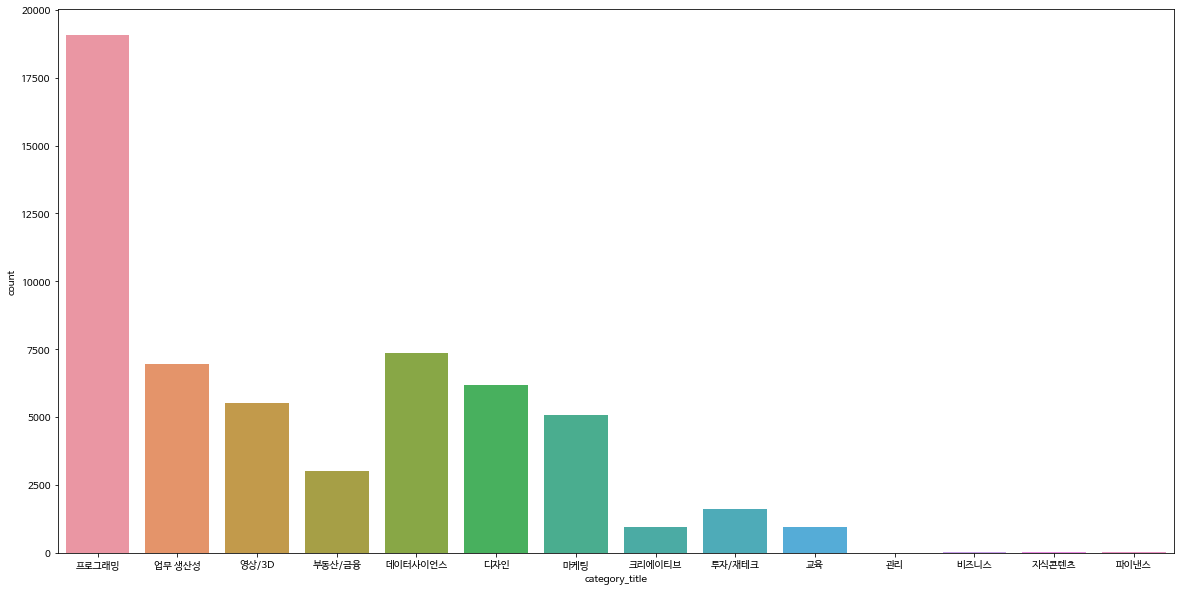

In [34]:
# 강의별 거래 횟수
plt.figure(figsize=(20,10))
sns.countplot(data=df_new, x='category_title')

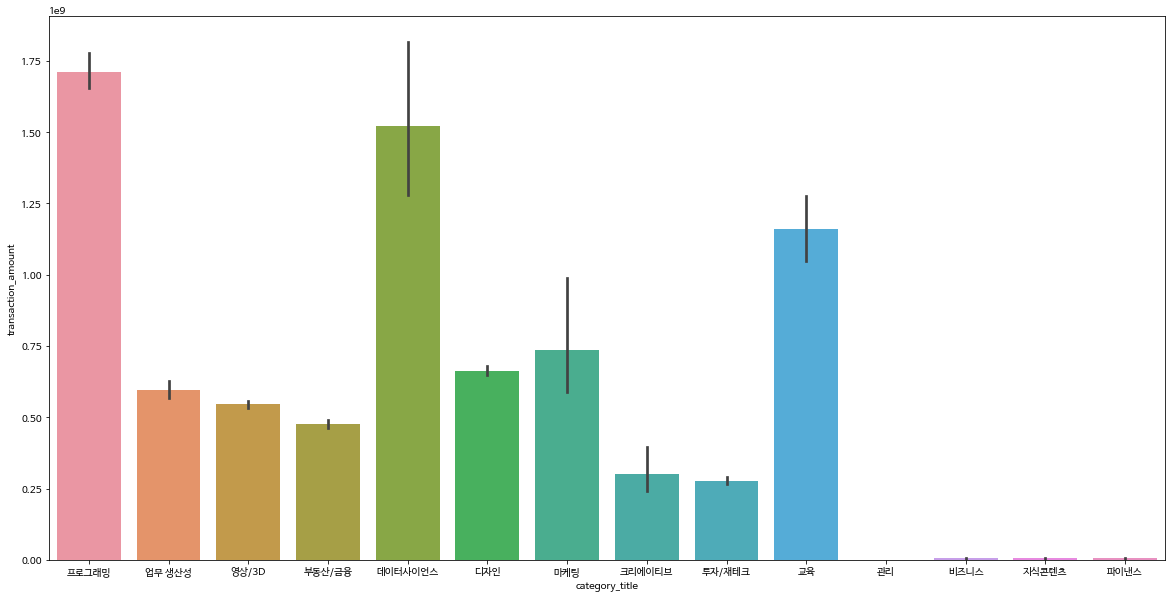

In [35]:
# 강의별 거래액
plt.figure(figsize=(20,10))
sns.barplot(x='category_title',y='transaction_amount', data=df_new, estimator=np.sum)

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56735 entries, 2 to 105418
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              56735 non-null  int64  
 1   id                      56735 non-null  int64  
 2   customer_id             56735 non-null  float64
 3   course_id               54579 non-null  float64
 4   type                    56735 non-null  object 
 5   state                   56735 non-null  object 
 6   course_title            56734 non-null  object 
 7   category_title          56731 non-null  object 
 8   format                  56734 non-null  object 
 9   completed_at            56735 non-null  object 
 10  transaction_amount      56735 non-null  int64  
 11  coupon_title            23760 non-null  object 
 12  coupon_discount_amount  23760 non-null  float64
 13  sale_price              55655 non-null  float64
 14  tax_free_amount         55655 non-nul

In [37]:
df_new
df_new[df_new['completed_at'].dt.month==9]

AttributeError: ignored

In [ ]:
# 강의별 거래 횟수
plt.figure(figsize=(20,10))
sns.countplot(data=df_new, x='category_title')

In [ ]:
## 달별로 그룹화하기
df_new_month = df_new.copy()
df_new_month['month'] = [k for k in df_new['completed_at'].dt.month] ## 요일 칼럼
df_new_month.tail()

In [ ]:
# 월별 거래 횟수
plt.figure(figsize=(20,10))
sns.countplot(data=df_new_month, x='month', hue = 'category_title')

In [ ]:
type(df_new_month['category_title'].unique()[11])
category = list(df_new_month['category_title'].unique())
category.pop(11)
category


In [ ]:
df_new_month[df_new_month['category_title']=='비즈니스' ].head()

In [ ]:
df_new_month['category_title'].unique()

In [ ]:
sns.countplot(data = df_new_month[df_new_month['category_title'] == '비즈니스' ], x='month')

In [ ]:
sns.set(rc={'figure.figsize':(15, 5)})
plt.figure(figsize=(20,15))
for i in range(len(category)):
    if str(df_new_month['category_title'].unique()[i]) == 'nan':
        continue
    plt.subplot(3,5,i+1)
    ax = sns.countplot(data = df_new_month[df_new_month['category_title'] == category[i] ], x='month')
    ax.set_title(category[i])
plt.figure

In [ ]:
sns.countplot(data=df_new_month[df_new_month['category_title']== '프로그래밍' ], x='month')
plt.figure

---------------------------------------------------------

---



In [ ]:
df_marketing_st = df_new[(df_new['marketing_start_at'].isnull())]

In [ ]:
df_new.columns

In [ ]:
# sales price / transaction price 
# coupon price가 없는데, sales price != transaction price 인 경우, 포인트로 사용한 것이다. -> 
df_new['point_amount'] = df_new[df_new['coupon_discount_amount'].isnull()]['sale_price']-df_new[df_new['coupon_discount_amount'].isnull()]['transaction_amount']

In [ ]:
df_new[~df_new['coupon_discount_amount'].isnull()]

In [ ]:
# coupon 도 쓰고, point도 쓴 사람이 있나?
# coupon_discount_amount + transaction_amount != sale_price
df_new[(df_new['coupon_discount_amount']+df_new['transaction_amount'] != df_new['sale_price'])&(df_new['point_amount'].isnull()) & (df_new['coupon_discount_amount'] < df_new['sale_price'])]
# coupon_discount_amount가 실제 할인 금액이랑 다른 경우가 존재한다.

In [ ]:
df_new[df_new['customer_id'] == 640697]

In [ ]:
df_new[df_new['customer_id'] == 670896]


In [ ]:
# 중복되는 customer_id 존재
df_new[df_new.duplicated('customer_id',keep=False)]

In [ ]:
df_new['state'] in ['COMPLETED','CANCELLED']

In [ ]:
df_cancel = df_new.loc[ (df_new['type'] =='PAYMENT') & (df_new['state']=='CANCELLED')]
df_cancel.head()

In [ ]:
df_cancel.isnull().sum()

    type = PAYMENT
    state = COMPLETED

    확실하게 수익으로 잡힐 수 있는 것만 수익 데이터로써 활용한다.

In [ ]:
# 수익 
df_rev = df.loc[ (df['type'] =='PAYMENT') & (df['state']=='COMPLETED')]

In [ ]:
df_rev.head()

In [ ]:
df_rev.shape